In [20]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import contingency

In [2]:
data = pd.read_csv('Glassdoor Gender Pay Gap.csv')

In [4]:
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
data.shape

(1000, 9)

In [7]:
data.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [8]:
data.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [9]:
data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


#

# 2-We want to know whether men and women choose different departments. (and if so which department)

#

In [10]:
data['Dept'].value_counts().to_frame()

,count
Dept,
Operations,210
Sales,207
Management,198
Administration,193
Engineering,192


In [11]:
data_gender = pd.crosstab(data['Dept'], data['Gender'])
data_gender

Gender,Female,Male
Dept,,
Administration,95,98
Engineering,89,103
Management,87,111
Operations,96,114
Sales,101,106


In [13]:
joint_dis_dept = data_gender/data_gender.sum()
joint_dis_dept

Gender,Female,Male
Dept,,
Administration,0.202991,0.184211
Engineering,0.190171,0.193609
Management,0.185897,0.208647
Operations,0.205128,0.214286
Sales,0.215812,0.199248


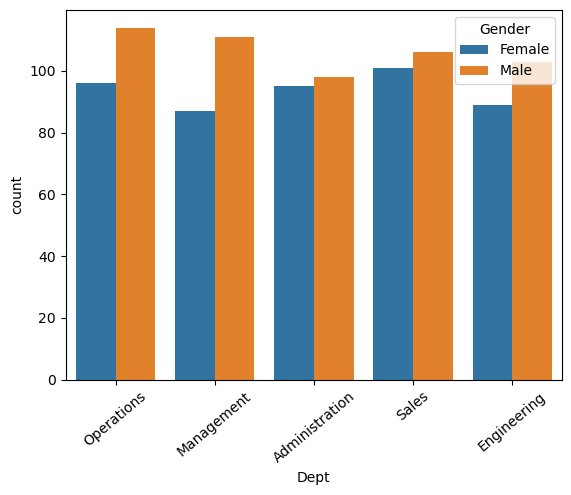

In [19]:
sns.countplot(data=data, x='Dept', hue='Gender')
plt.xticks(rotation=40)
plt.show()

In [21]:
x2, p_value, dof, expected_freq = stats.chi2_contingency(data_gender)
print(f"X2: {x2}, P value: {p_value}, degree of freedom: {dof}")

X2: 1.5505374579212654, P value: 0.8176532590847562, degree of freedom: 4


### There is no big difference between men and women

<Axes: xlabel='Gender', ylabel='Dept'>

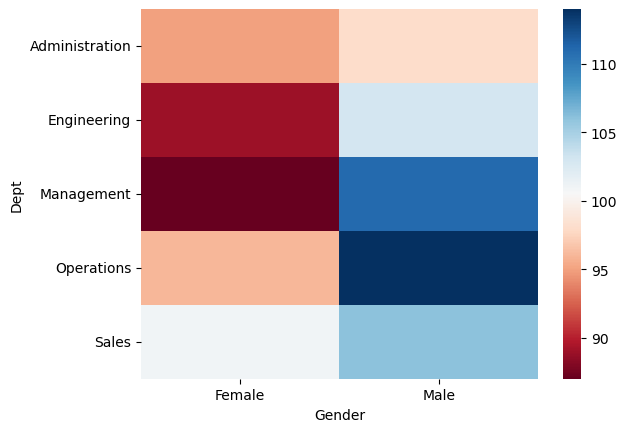

In [23]:
sns.heatmap(data_gender,cmap='RdBu')